In [1]:
# heart disease prediction # predict # patient have heart disease or not based on past data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(302, 14)

In [9]:
col=df.columns

In [10]:
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
len(col)

14

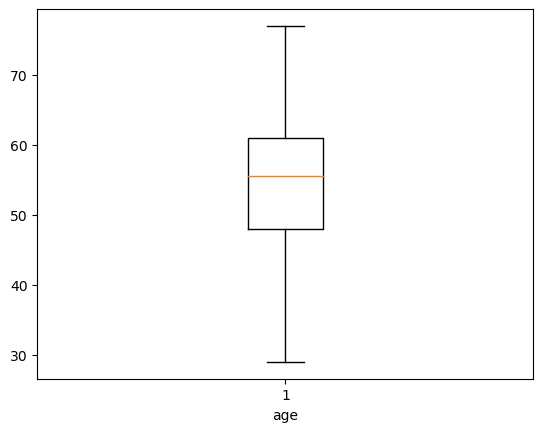

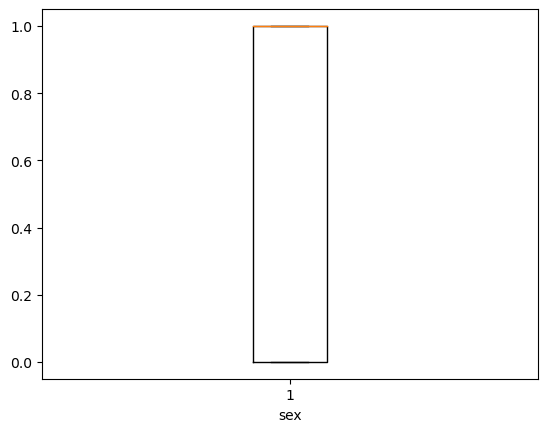

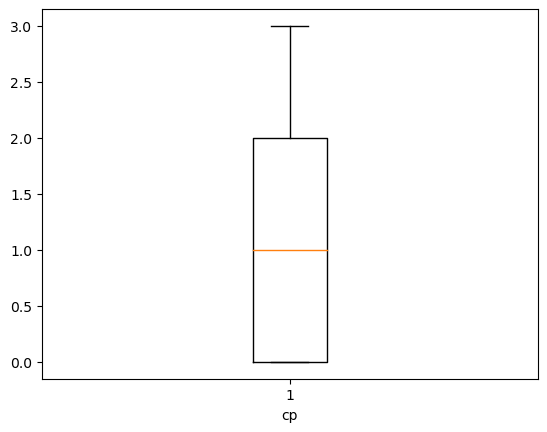

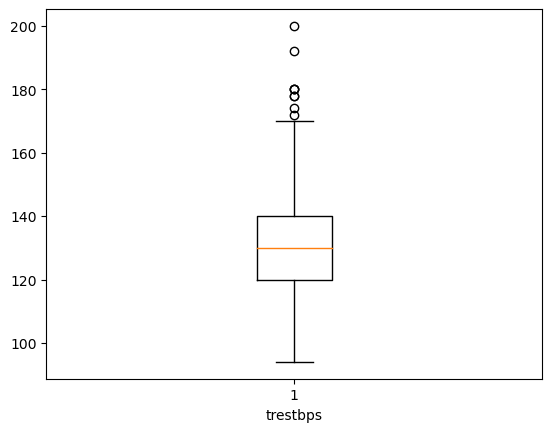

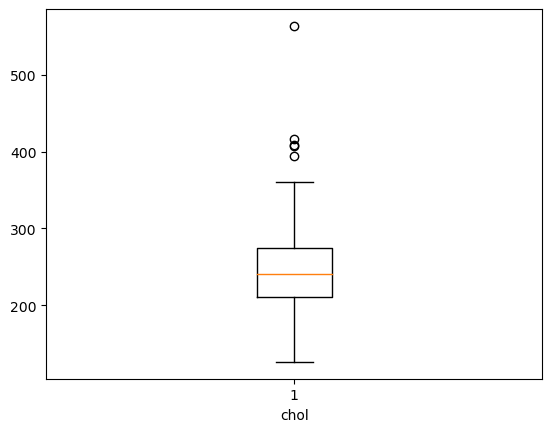

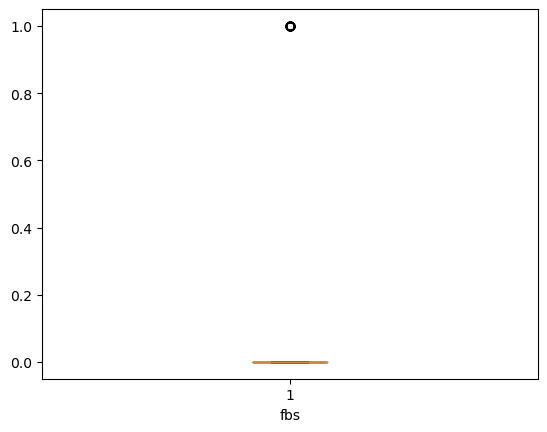

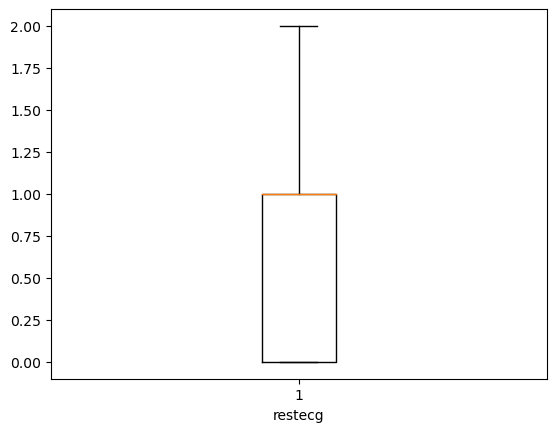

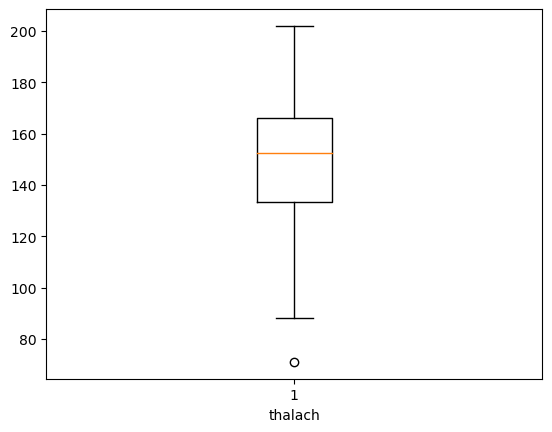

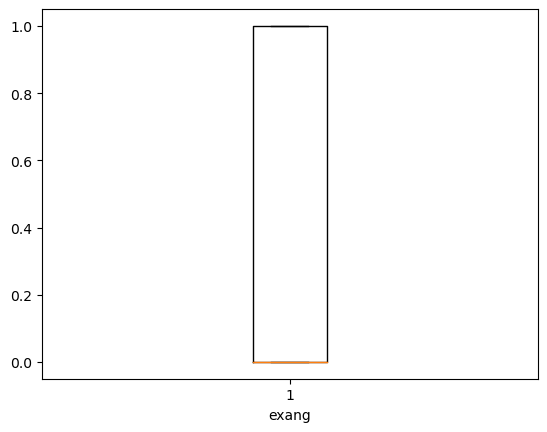

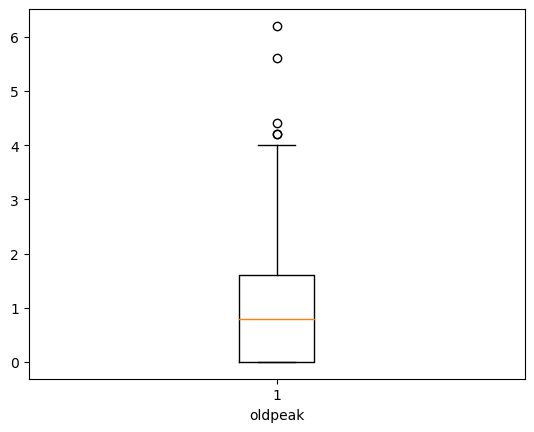

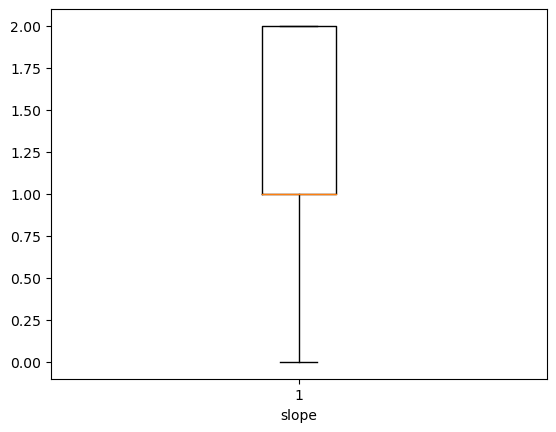

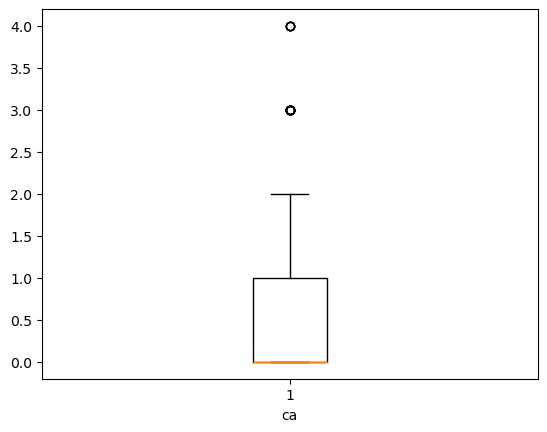

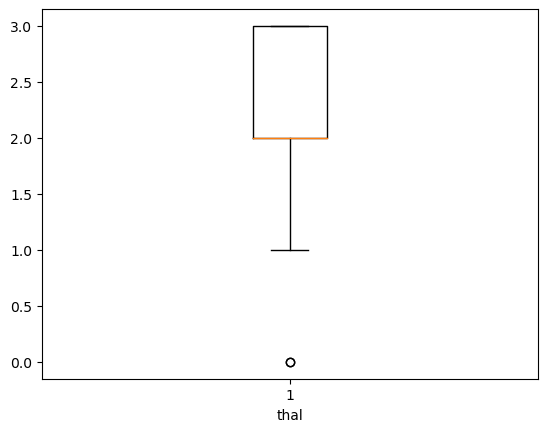

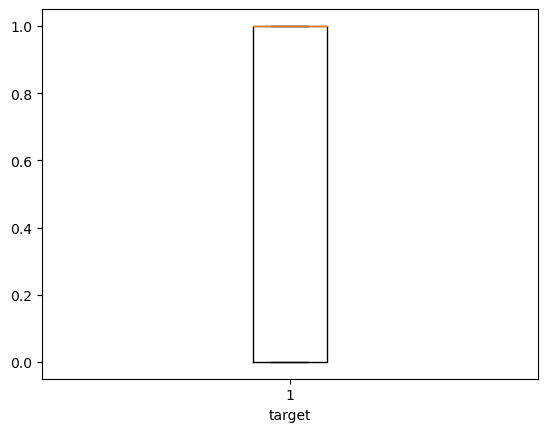

In [13]:
# outlier

for i in col:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [14]:
out_cols=['trestbps','chol','thalach','oldpeak','ca','thal']

In [15]:
df.fbs.value_counts()

0    257
1     45
Name: fbs, dtype: int64

In [16]:
for i in out_cols:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[i]>=LL)&(df[i]<=UL)]

In [18]:
df.shape

(261, 14)

<AxesSubplot:xlabel='age', ylabel='Count'>

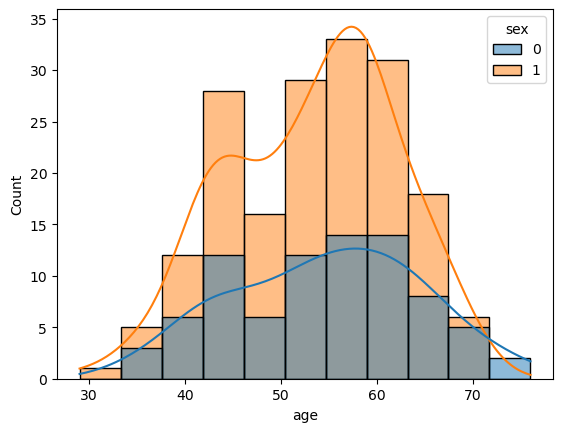

In [30]:
# visualisation

sns.histplot(x='age',hue='sex', data=df, kde=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

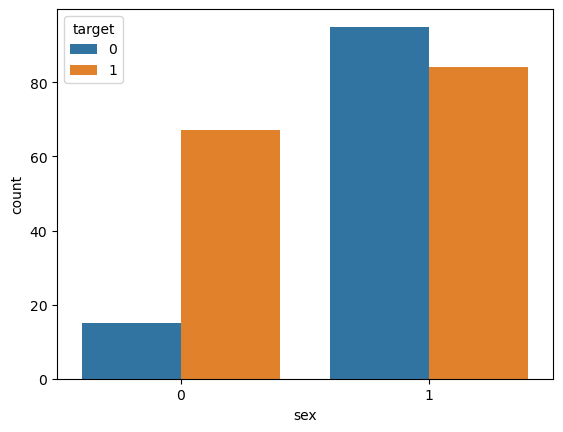

In [31]:
sns.countplot(data=df, x='sex',hue='target')

<AxesSubplot:xlabel='sex', ylabel='Count'>

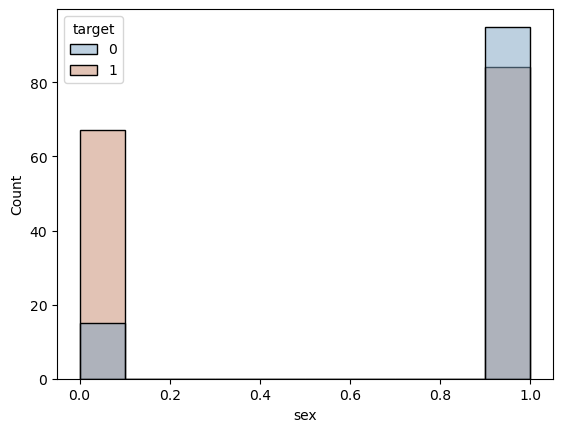

In [28]:
sns.histplot(data=df, x='sex',hue='target', palette='twilight_shifted')

In [36]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


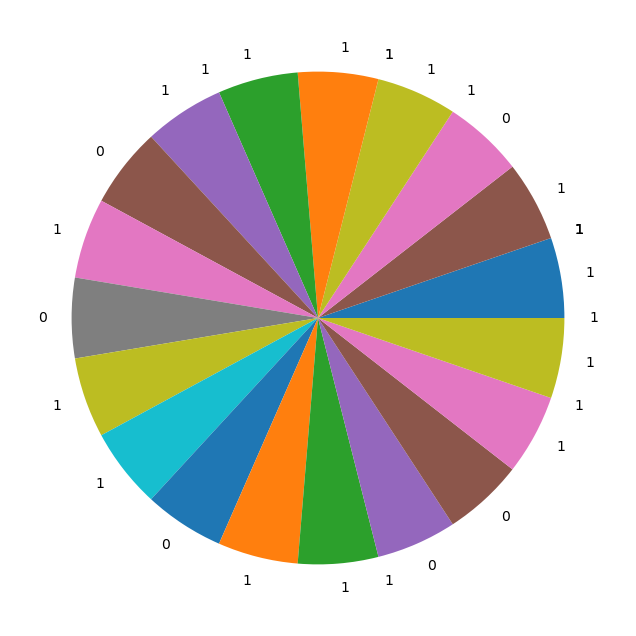

In [40]:
plt.figure(figsize=(10,8))
plt.pie(data=df.sample(30),x='target',labels='sex')
plt.show()

In [41]:
# correlation

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.073351,-0.035241,0.278920,0.133812,0.129412,-0.093388,-0.402763,0.087981,0.196866,-0.142630,0.384780,0.065053,-0.200652
sex,-0.073351,1.000000,-0.095629,0.004428,-0.136354,0.058807,-0.085572,-0.057410,0.173593,0.169247,-0.061194,0.089277,0.250717,-0.326947
cp,-0.035241,-0.095629,1.000000,0.107239,-0.036392,0.144697,0.064762,0.275477,-0.374546,-0.121328,0.079260,-0.210705,-0.186138,0.404529
trestbps,0.278920,0.004428,0.107239,1.000000,0.095666,0.137721,-0.130787,-0.039151,-0.015670,0.155010,-0.059844,0.056375,-0.007052,-0.088727
chol,0.133812,-0.136354,-0.036392,0.095666,1.000000,-0.020748,-0.120110,0.004277,0.050308,-0.025590,0.055914,0.087311,0.078786,-0.081495
fbs,0.129412,0.058807,0.144697,0.137721,-0.020748,1.000000,-0.080167,-0.009086,-0.009135,0.024096,-0.081466,0.115061,-0.077256,-0.002147
restecg,-0.093388,-0.085572,0.064762,-0.130787,-0.120110,-0.080167,1.000000,0.066547,-0.091047,-0.089314,0.120631,-0.081091,0.057675,0.144633
thalach,-0.402763,-0.057410,0.275477,-0.039151,0.004277,-0.009086,0.066547,1.000000,-0.418355,-0.338750,0.372933,-0.247480,-0.139463,0.403880
exang,0.087981,0.173593,-0.374546,-0.015670,0.050308,-0.009135,-0.091047,-0.418355,1.000000,0.348314,-0.265311,0.185935,0.250552,-0.425255
oldpeak,0.196866,0.169247,-0.121328,0.155010,-0.025590,0.024096,-0.089314,-0.338750,0.348314,1.000000,-0.527422,0.277341,0.183205,-0.439291


<AxesSubplot:>

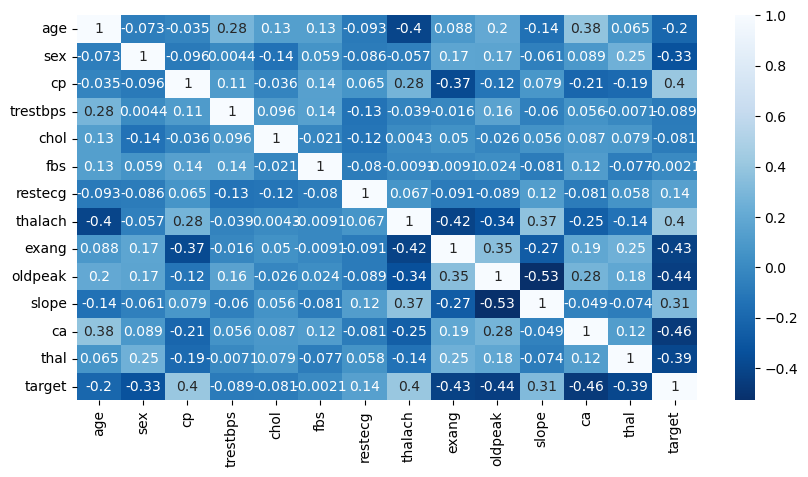

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True)

In [50]:
# no vif because we cant skip any feature

# model building

x=df.iloc[:,:-1]  # all rows, all columns except last one
y=df['target']

In [51]:
print(x.shape, y.shape)

(261, 13) (261,)


In [52]:
df.shape

(261, 14)

In [79]:
# splitting data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [80]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(208, 13) (208,) (53, 13) (53,)


In [81]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()

In [82]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
y_pred=dtc.predict(x_test)

In [84]:
y_pred.shape

(53,)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [86]:
cm=confusion_matrix(y_pred, y_test)

<AxesSubplot:>

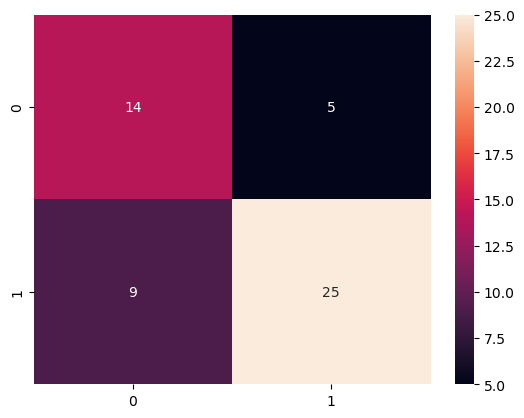

In [87]:
sns.heatmap(cm, annot=True)

In [88]:
accuracy_score(y_pred, y_test)

0.7358490566037735

In [90]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        19
           1       0.83      0.74      0.78        34

    accuracy                           0.74        53
   macro avg       0.72      0.74      0.72        53
weighted avg       0.75      0.74      0.74        53



In [91]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [92]:
dt=DecisionTreeClassifier()

In [93]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
y_pr=dt.predict(x_test)

In [95]:
accuracy_score(y_pr,y_test)

0.6708860759493671

In [99]:
list(range(1,16))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [110]:
parameter_value=list(range(1,16))

In [111]:
df1=pd.DataFrame(columns=['max_depth','accuracy'])
df1

,max_depth,accuracy


In [112]:
for x in parameter_value:
    model=DecisionTreeClassifier(max_depth=x,random_state=0)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_pred, y_test)*100
    df1=df1.append({'max_depth':x,'accuracy':acc_score},ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12936\2068832275.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'max_depth':x,'accuracy':acc_score},ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12936\2068832275.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'max_depth':x,'accuracy':acc_score},ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12936\2068832275.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'max_depth':x,'accuracy':acc_score},ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12936\2068832275.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

In [113]:
df1

,max_depth,accuracy
0,1.0,68.354430
1,2.0,75.949367
2,3.0,75.949367
3,4.0,69.620253
4,5.0,67.088608
5,6.0,67.088608
6,7.0,63.291139
7,8.0,64.556962
8,9.0,65.822785
9,10.0,65.822785


In [114]:
# at 2nd the accuracy is highest so we will go with it

final_model=DecisionTreeClassifier(max_depth=2, random_state=0)
final_model.fit(x_train,y_train)
y_predict=final_model.predict(x_test)
accuracy_score(y_predict, y_test)

0.759493670886076

<AxesSubplot:>

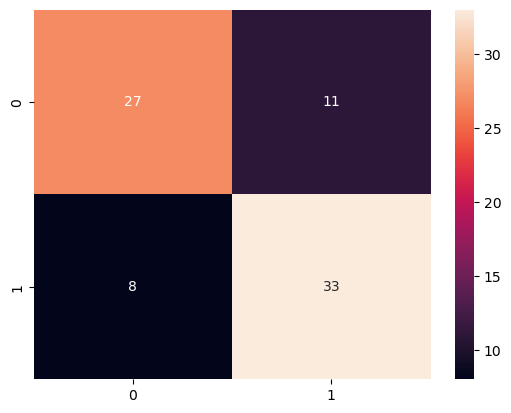

In [116]:
cm=confusion_matrix(y_predict,y_test)
sns.heatmap(cm, annot=True)

In [117]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        38
           1       0.75      0.80      0.78        41

    accuracy                           0.76        79
   macro avg       0.76      0.76      0.76        79
weighted avg       0.76      0.76      0.76        79

